참고자료: https://python.plainenglish.io/clustering-textual-data-with-word2vec-866dafbd213f, gpt

Word2Vec 알고리즘은 Google에서 발명한 자연어 처리 기술로 단어를 실수 벡터에 매핑하는 데 사용되는 모델, 즉 임베딩을 생성하는 데 사용되는 모델로 구성된다. 단어 임베딩의 기본 아이디어는 텍스트에서 유사한 맥락에서 발생하는 단어가 벡터 공간에서 서로 더 가까운 경향이 있다는 것이다. 그 이후로 기계 학습 모델에서 단어의 벡터 표현을 사용하는 것은 널리 확립된 표준이 되었다. 많은 경우 임베딩 레이어 없이 순환 신경망(RNN) 모델을 훈련하는 것은 별 의미가 없다.

그렇다면 말뭉치에 있는 단어의 의미론적 의미를 기반으로 텍스트 데이터를 어떻게 클러스터링할 수 있을까? 

word2vec으로 학습한 단어의 벡터 표현이 2D 공간에서 의미적으로 유사한 단어를 서로 가깝게 배치해야 한다는 것이다. 적절한 클러스터링 기술을 사용하면 텍스트의 단어를 유사한 그룹으로 그룹화하고 나중에 분석 프로세스에서 클러스터로 작업할 수 있다.

Python에서의 구현은 다음 단계로 진행된다.
- 데이터 정리(구두점, 숫자 및 불용어 제거)
- word2vec 모델 훈련
- 주성분 분석을 통한 차원 축소
- K-평균을 사용한 클러스터링

<참고>
- https://jalammar.github.io/illustrated-word2vec/
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

In [107]:
documents = ["I love dogs and cats",
             "Dogs are the best pets",
             "Cats are independent animals",
             "I prefer dogs over cats",
             "Dogs and cats make great companions",
             "I enjoy playing with dogs",
             "Cats are graceful animals"]

#### - 데이터 전처리

In [108]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Tokenize the documents
tokenized_documents = [word_tokenize(doc.lower()) for doc in documents]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\heo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### - Word2Vec 모델 학습

In [109]:
from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(tokenized_documents, size=100, window=5, min_count=1, workers=4)

#### - 문서 벡터 생성

In [110]:
import numpy as np

# Generate document vectors
document_vectors = np.array([np.mean([word2vec_model.wv[word] for word in doc], axis=0) for doc in tokenized_documents])

#### - k-평균을 사용하여 문서 클러스터링

In [111]:
from sklearn.cluster import KMeans

# Perform k-means clustering
num_clusters = 2  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(document_vectors)
cluster_labels = kmeans.labels_

In [112]:
cluster_labels

array([1, 1, 0, 1, 1, 1, 0])

C:\ProgramData\Anaconda3\envs\intown\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\ProgramData\Anaconda3\envs\intown\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


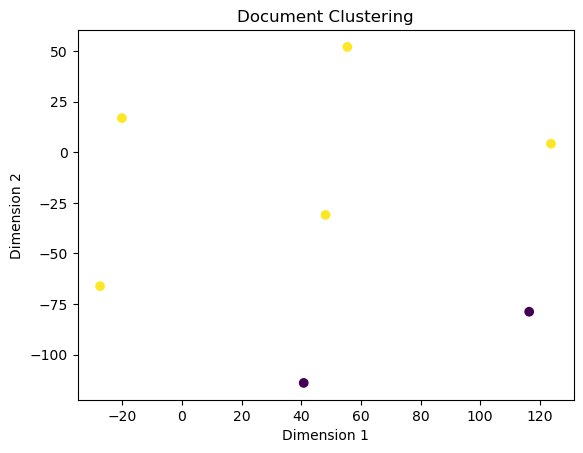

In [113]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensionality of document vectors
tsne = TSNE(n_components=2, random_state=42)
document_vectors_2d = tsne.fit_transform(document_vectors)

# Plot the clusters
plt.scatter(document_vectors_2d[:, 0], document_vectors_2d[:, 1], c=cluster_labels)
plt.title("Document Clustering")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

- - -

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [7]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
train_data = pd.read_table('ratings.txt')
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [8]:
print(train_data.isnull().values.any()) # 결측값 유무 확인

train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

True
False


In [9]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data.head()

C:\ProgramData\Anaconda3\envs\intown\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [10]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

from tqdm import tqdm
tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████| 199992/199992 [05:37<00:00, 592.50it/s]


In [83]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 300, workers = 4)

In [84]:
document_vectors = model.wv.vectors

In [85]:
from sklearn.cluster import KMeans

# Perform k-means clustering
num_clusters = 10  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(document_vectors)
cluster_labels = kmeans.labels_

cluster_labels

array([3, 4, 7, ..., 8, 3, 1])

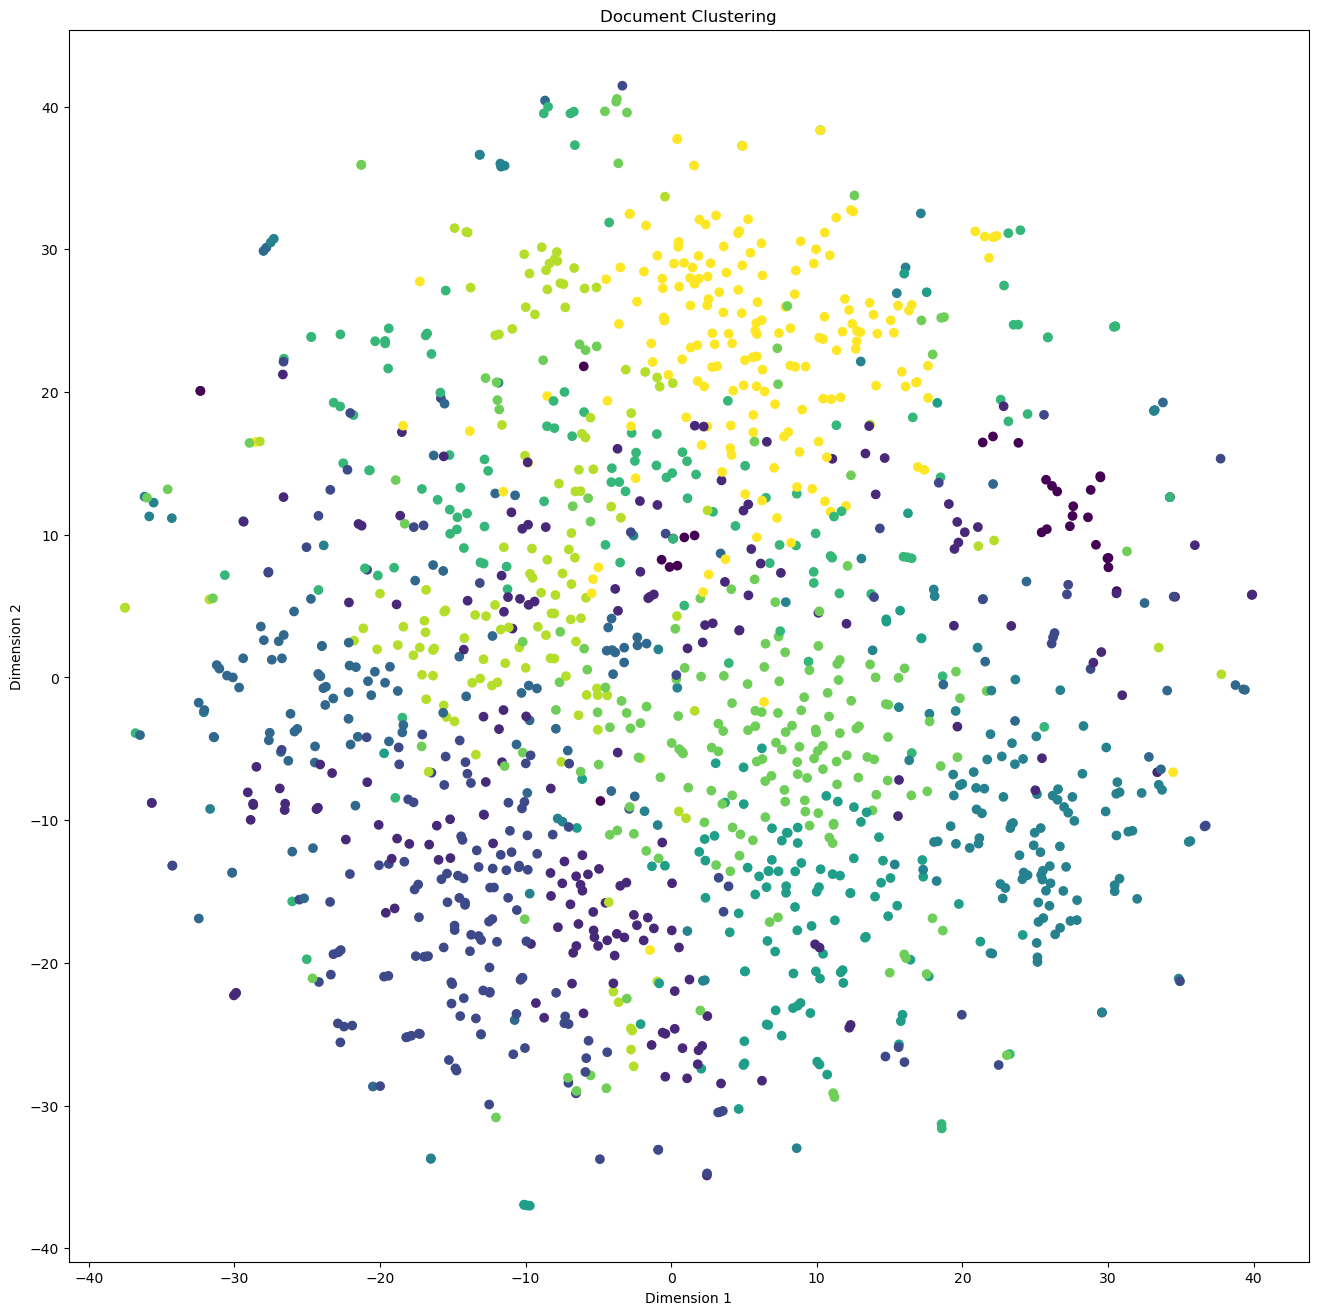

In [82]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensionality of document vectors
tsne = TSNE(n_components=2, random_state=42)
document_vectors_2d = tsne.fit_transform(document_vectors)

# Plot the clusters
plt.figure(figsize=(16, 16)) 
plt.scatter(document_vectors_2d[:, 0], document_vectors_2d[:, 1], c=cluster_labels)
plt.title("Document Clustering")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [86]:
def tsne_plot(model):
    import warnings

    # 경고메세지 끄기
    warnings.filterwarnings(action='ignore')
    
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)
        
    tsne = TSNE(n_components=2, random_state=42)
    document_vectors_2d = tsne.fit_transform(document_vectors)

    x = []
    y = []
    for value in document_vectors_2d:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.rcParams['font.family'] = 'Gulim'
        plt.scatter(document_vectors_2d[:, 0], document_vectors_2d[:, 1], c=cluster_labels)
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

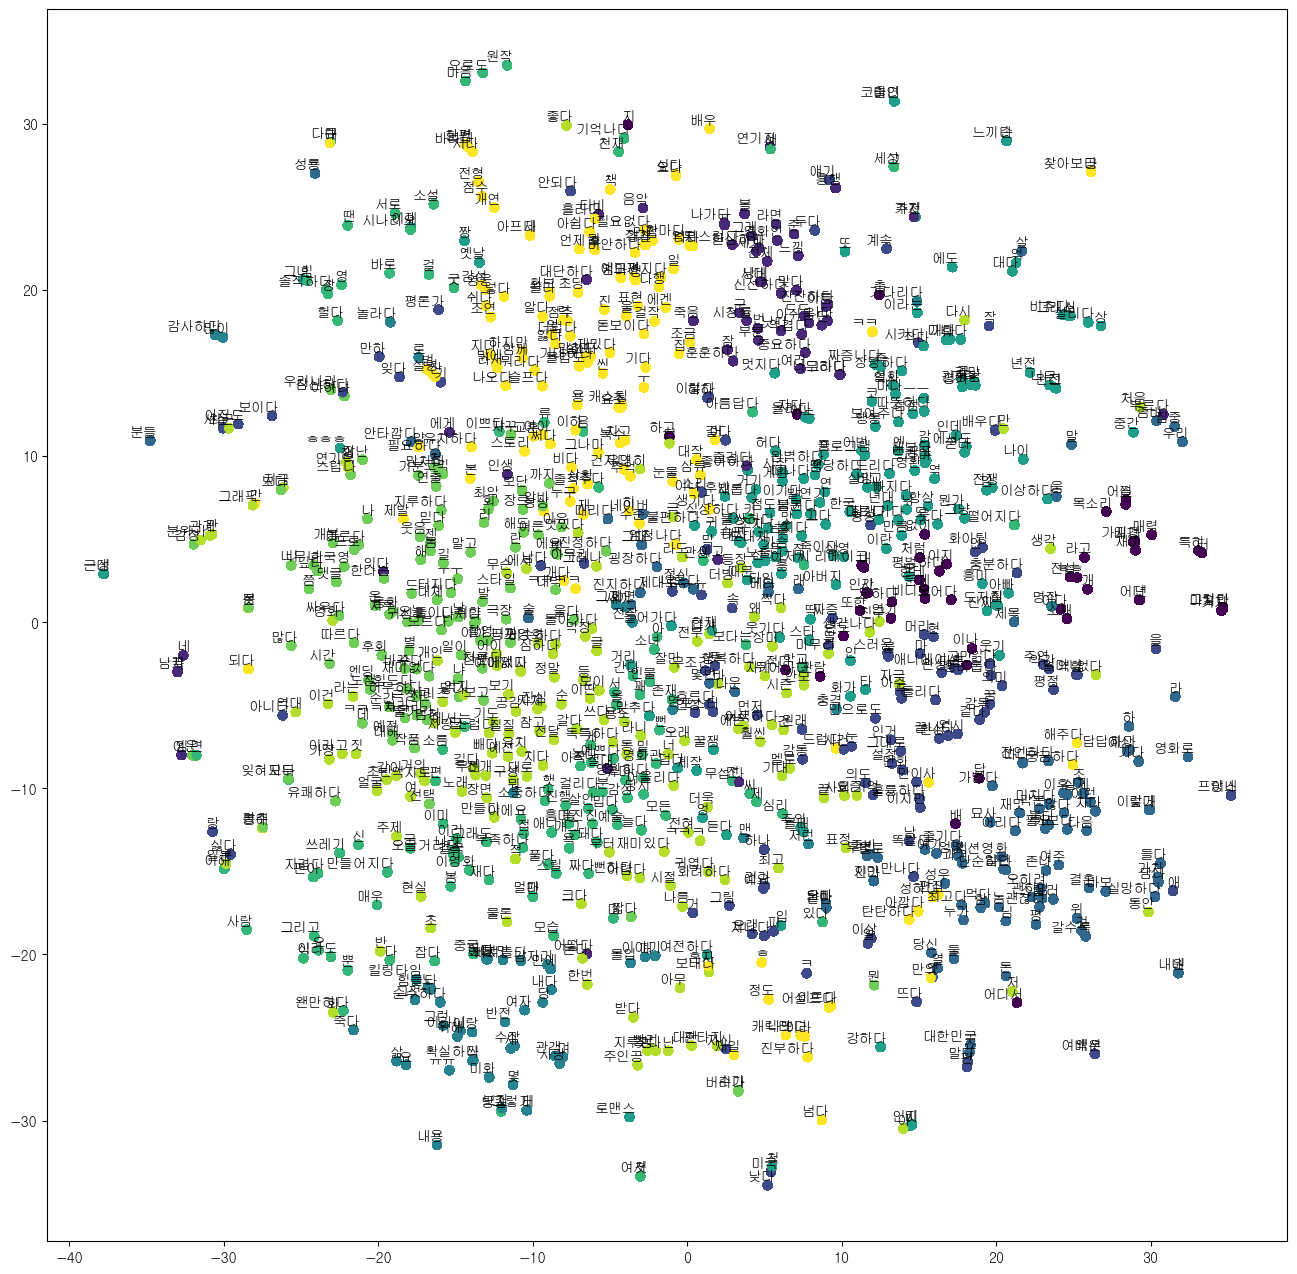

In [87]:
tsne_plot(model)